In [62]:
##the first thing you want to do is import all the packages 
import numpy as np ##as np gives numpy a name! ##What does numpy do? 

##then you want to import packages for plotting 

import matplotlib.pyplot as plot 
#note here sayantan uses plt instead of plot! 

#you then want to import another package for scipy to work with the error function scipy.special includes the erfc funciton 

from scipy.special import erfc


In [63]:
##Once all the packages are loaded into the system you want to start loading the text file you are working with!!
## so you are going to use the command open to open the txt file! Now since this is already in a column vector you really don't need to strip or split
##how would you open a text file if you have to? 
fp = open("ONC.dat", 'r') 
##why do you specify this 'r' thing? 
##now what if you want to see fp? 

print(fp) #now basically this is  storage file so you really can't print the data inside! you need to assign an array or a list to do so!


<_io.TextIOWrapper name='ONC.dat' mode='r' encoding='UTF-8'>


In [64]:
## after opening the data file into the  fp thing you want to assign an array so you just assign an empty array. You donot need to specify the size. So how does python work? 
mass =[]

## Python reads top to bottom left to right.
for line in fp:
    #print(line.strip().split())
    #print(line.strip())
## t is a list. You can check by type(variable)
    t = line.strip().split()              
    for value in t:
        # the func append helps to modify the array storage
        # python returns a string, but we need a floating point
        mass.append(float(value))   

## closing the file after it reads in the data *important 
fp.close()  

##to convert mass python list to numpy array list for easy manipulation
## so you want to change the mass list to an array! 
mass_array = (np.asarray(mass))    
## mass_array is essentially our column vector that is storing values for the data points!
## so np.asarray assigns array to mass ..so basically it is picking up from the module numpy! to treat arrays!


## why don't you directly assign for line in fp to mass list. 
## so you'll get a closed fp error if you have already closed the file so you will have to run it from the top!


In [72]:
print(mass_array)



[ 0.42   0.51   0.19  ...,  0.128  0.192  0.177]


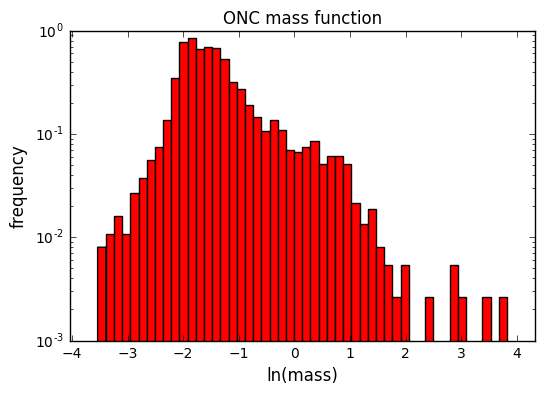

In [79]:
## so now you want to start working the array! that you have for mass and obtain the mass function!
plot.figure(1)
binsize = 50

## now you want to plot the histogram!!
plot.hist(np.log(mass_array),binsize,normed = 1, facecolor = 'red',cumulative= False)
plot.xlim(min(np.log(mass_array))-0.5,max(np.log(mass))+0.5)
##you want to plot your y axis in log as well 
plot.yscale('log')
plot.title("ONC mass function", fontsize = 12)
plot.xlabel("ln(mass)", fontsize = 12)
plot.ylabel("frequency",fontsize = 12)
plot.show()


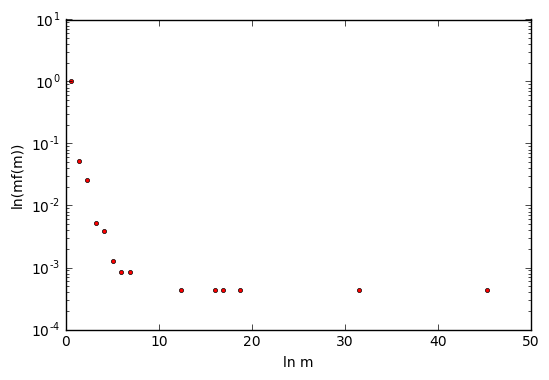

In [109]:
#now you want o extract information from the histogram!
#the command below will give bincount and bin_edge!
#from there we will find the bincenter by the formula
# 
bincount,bin_edge = np.histogram(mass_array,binsize,normed =1) 
bincenter = (bin_edge[1:]+bin_edge[:-1])/2.0

# so here what was binedge[1:] and binedge[:-1] doing? 
#then you just want to plot that as data points so just assign an array to the bincenter and bincount array

xdata = bincenter[:]
ydata = bincount[:]
plot.figure(2)
plot.plot(xdata,ydata,'ro', markersize = 3)
plot.ylabel('ln(mf(m))')
plot.xlabel('ln m')
plot.yscale('log')
plot.show()

In [110]:
print(xdata)

[  0.48571   1.39913   2.31255   3.22597   4.13939   5.05281   5.96623
   6.87965   7.79307   8.70649   9.61991  10.53333  11.44675  12.36017
  13.27359  14.18701  15.10043  16.01385  16.92727  17.84069  18.75411
  19.66753  20.58095  21.49437  22.40779  23.32121  24.23463  25.14805
  26.06147  26.97489  27.88831  28.80173  29.71515  30.62857  31.54199
  32.45541  33.36883  34.28225  35.19567  36.10909  37.02251  37.93593
  38.84935  39.76277  40.67619  41.58961  42.50303  43.41645  44.32987
  45.24329]


In [111]:
print(ydata)

[  1.00283830e+00   5.19894748e-02   2.53502398e-02   5.15598097e-03
   3.86698573e-03   1.28899524e-03   8.59330162e-04   8.59330162e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.29665081e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.29665081e-04   4.29665081e-04   0.00000000e+00
   4.29665081e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.29665081e-04   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   4.29665081e-04]


In [119]:
#defining MLP function now. 

def MLP(x,alpha,mu0,sigma0):
    p1 = (alpha/2.0)*np.exp(alpha*mu0+((alpha*sigma0)**2)/2.0)
    p2 = x**(-(1+alpha))
    arg = (1.0/np.sqrt(2.0))*(alpha*sigma0-(np.log(x)-mu0)/sigma0)
    p3 = erfc(arg)
    p = p1*p2*p3
    return(p)

#now uing the curvefit function to optimize

from scipy.optimize import curve_fit
np.random.seed(1) #maybe this might fix the convergence point
fitParams,fitConv=curve_fit(MLP,xdata,ydata,bounds=([0.,-3,0,],[5., 5., 5.]))
print('alpha=%f\n'%(fitParams[0]))
print('mu_0=%f\n'% (fitParams[1]))
print('sigma_0=%f\n'%(fitParams[2]))

alpha=1.725628

mu_0=-1.471475

sigma_0=0.137365



In [117]:
#now we would do differential optimization 
